In [1]:
%matplotlib widget
import json
import numpy as np
import os
from glob import glob
from pprint import pprint
from pathlib import Path, PosixPath
import cv2
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
def load_json(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data

def dump_json(path, data):
    Path(path).parent.mkdir(parents=True, exist_ok=True)
    with open(path, 'w') as f:
        json.dump(data, f)
#AFLW
# "roll","pitch","yaw",
def load_text(path):
    with open(path) as f:
        return [l.replace("\n", "") for l in f.readlines()]

In [9]:

campose_lines = load_text(
    "/aidata/evianlee/dataset/AFLW/aflw/data/campose.txt")
facepose_lines = load_text(
    "/aidata/evianlee/dataset/AFLW/aflw/data/facepose.txt")
alfw_lines = load_text(
    "/aidata/evianlee/dataset/AFLW/aflw/data/alfw.txt")
faceid_lines = load_text(
    "/aidata/evianlee/dataset/AFLW/aflw/data/faceid.txt") 
img_root= "/aidata/evianlee/dataset/AFLW/clean/ALFW_clean/ALFW_clean/data"
rows, cols = 1, 4
a =0
rolls, pitchs, yaws = [], [], []
# image71361.jpg
for i, (caampose_line, facepose_line, faceid_line) in enumerate(zip(campose_lines[1:], facepose_lines[1:], faceid_lines[1:])):
    name =str(caampose_line.split(",")[0])
    file_name = faceid_line.split(",")[1]
    tmp_str = str()
    for i, n in enumerate(file_name):
        if i > 0 and i < len(file_name) -1:
            tmp_str +=n
    name = tmp_str
    img_path = os.path.join(img_root, name)
    img = cv2.imread(img_path)
    if img is None:
        continue
    a += 1
    # "roll","pitch","yaw"
    roll = facepose_line.split(",")[1]
    tmp_str = str()
    for i, n in enumerate(roll):
        if i > 0 and i < len(roll) -1:
            tmp_str +=n
    roll = float(tmp_str) * 57.3 
    rolls.append(roll)
    
    pitch = facepose_line.split(",")[2]
    tmp_str = str()
    for i, n in enumerate(pitch):
        if i > 0 and i < len(pitch) -1:
            tmp_str +=n
    pitch = float(tmp_str) * 57.3 
    pitchs.append(pitch)
    yaw = facepose_line.split(",")[3]
    tmp_str = str()
    for i, n in enumerate(yaw):
        if i > 0 and i < len(yaw) -1:
            tmp_str +=n
    yaw = float(tmp_str) * 57.3 
    yaws.append(yaw)    

In [8]:
r, p, y = rolls, pitchs, yaws 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
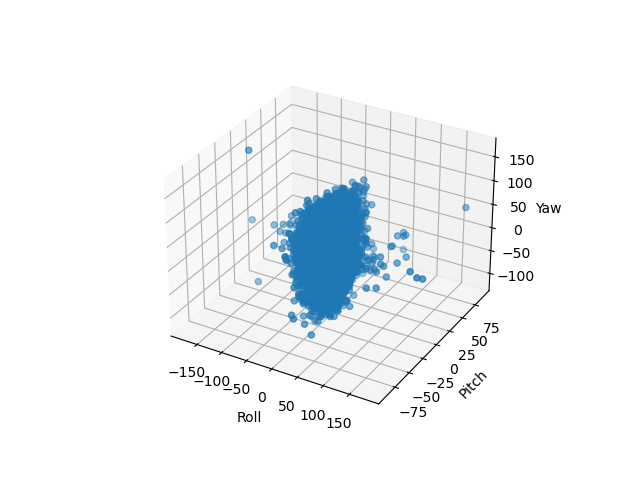

In [20]:
from mpl_toolkits.axisartist.axislines import SubplotZero

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(rolls, pitchs, yaws )
ax.set_xlabel("Roll")
ax.set_ylabel("Pitch")
ax.set_zlabel("Yaw")

plt.show()